In [2]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

# 맷플롯립 한글 폰트 지정
import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
%matplotlib inline

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

import warnings
warnings.filterwarnings('ignore')

## 비지도 학습의 종류

비지도 변환; 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘이다. 비지도 변환이 널리 사용되는 분야는 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소(dimensionality reduction) 이다. 비지도 변환으로 데이터를 구성하는 단위나 성분을 찾기도 한다. 많은 텍스트 문서에서 주제를 추출하는 것이 대표적인 예이다.

군집 알고리즘; 데이터를 비슷한 것끼리 그룹으로 묶은 것이다. 소셜 미디어 사이트에 사진을 업로드하는 예를 생각해볼때, 업로드한 사진을 분류하려면 같은 사람이 찍힌 사진을 같은 그룹으로 묶을 수 있다. 사진에 나타난 모든 얼굴을 추출해서 비슷한 얼굴로 그룹 짓는 것이다.

## 비지도 학습의 도전 과제

비지도 학습에서 가장 어려운 일은 알고리즘이 뭔가 유용한 것을 학습했는지 평가하는 것이다. 비지도 학습은 보통 레이블이 없는 데이터에 적용하기 때문에 무엇이 올바른 출력인지 모른다. 그래서 어떤 모델이 일을 잘하고 있는지 이야기하기가 매우 어렵다. 비지도 학습의 결과를 평가하기 위해서는 직접 확인하는 것이 유일한 방법일 때가 많다.

이런 이유로 비지도 학습 알고리즘은 데이터 과학자가 데이터를 더 잘 이해하고 싶을 때 탐색적 분석 단계에서 많이 사용된다. 비지도 학습은 지도 학습의 전처리 단계에서도 사용한다. 비지도 학습의 결과로 새롭게 표현된 데이터를 사용해 학스하면 지도 학습의 정확도가 좋아지기도 하며 메모리의 시간을 절약할 수 있다.

## 데이터 전처리와 스케일 조정

`StandardScaler`는 각 특성의 평균을 0, 분산을 1로 변경하여 모든 이 같은 크기를 가지게 된다. 그러나 이 방법은 특성의 최솟값과 최댓값 크기를 제한하지 않는다. `RobusScaler`는 특성들이 같은 스케일이 갖게 된다는 통계적 측면에서는 `StandardScaler`와 비슷하다. 하지만 평균과 분산 대신 중간 값(median)과 사분위 값(quartile)을 사용한다. 이런 방식 때문에 `RobustScaler`는 전체 데이터와 아주 동떨어진 데이터 포인트에 영향을 받지 않는다. 이런 이상 데이터를 이상치(outlier)라 하며 다른 스케일 조정 기법에서는 문제가 될 수 있다.

반면에 MinMaxScaler는 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경한다. 2차원 데이터셋일 경우에는 모든 데이터가 x 축의 0과 1, y 축의 0과 1사이의 사각 영역에 담기게 된다.

마지막으로 Normalizer는 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인터를 조정한다. 다른 말로 하면 지름이 1인 원에 데이터 포인트를 투영한다. 이러한 정규화는 특성 벡터의 길이는 상관없고 데이터의 방향만이 중요할 때 많이 사용한다.

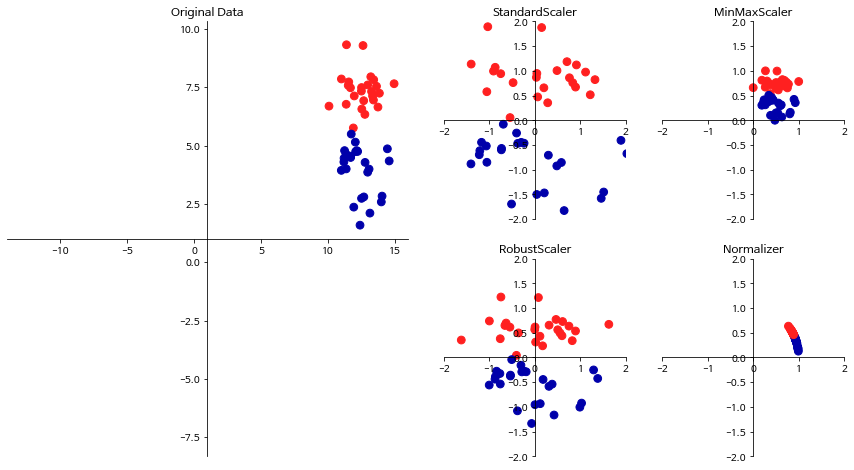

In [3]:
mglearn.plots.plot_scaling()

### 데이터 변환 적용하기

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최대값:
 [0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


### QuantileTransformer와 PowerTransformer

QuantileTransformer는 기본적으로 1,000개의 분위를 사용하여 데이터를 균등하게 분포시킨다.

In [10]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

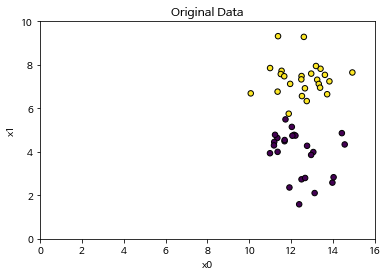

In [11]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

QuantileTransformer를 적용해보겠다.

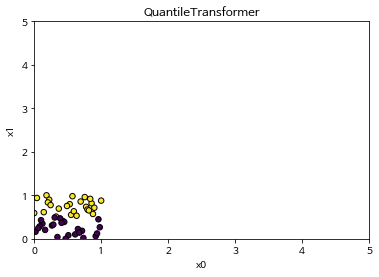

In [19]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

랜덤하게 흩어져 있던 데이터 포인트들이 두 특성의 0과 1사이에 고르게 분포되어 있다. 변환된 데이터의 히스토그램을 그려보면 균등 분포를 확인할 수 있다.

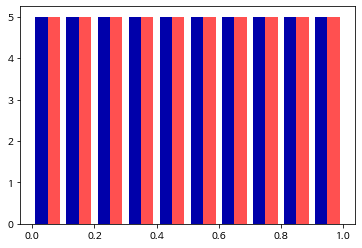

In [13]:
plt.hist(X_trans)
plt.show()

In [14]:
print(scaler.quantiles_.shape)

(50, 2)


좀 더 간단한 샘플 데이터를 만들어 변환 결과를 비교해보자.

In [15]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [20]:
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


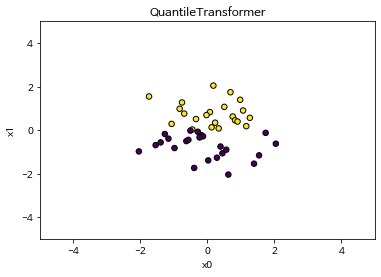

In [22]:
# output_distribution를 사용해서 정규분포를 만듬
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

변환기의 결과를 히스토그램으로 확인해보는 것이 좋다.

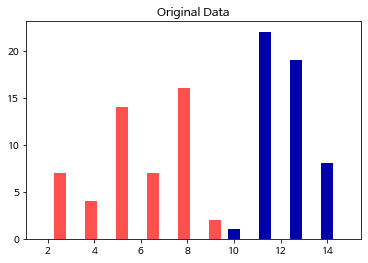

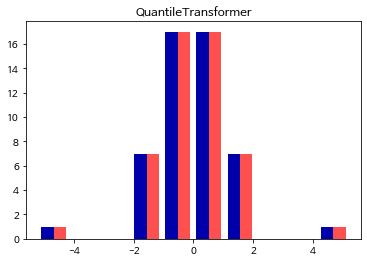

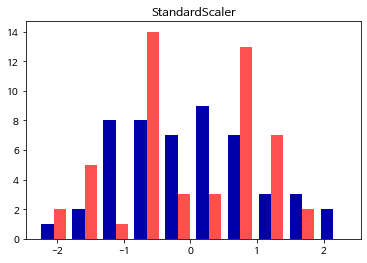

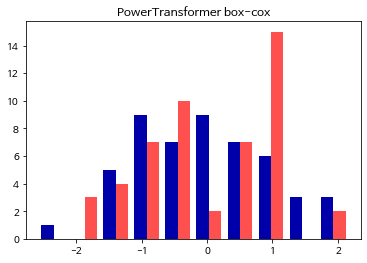

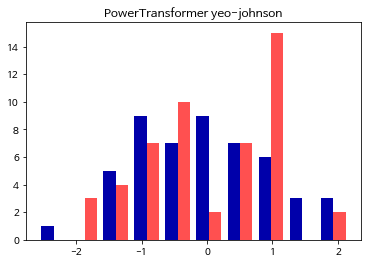

In [18]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

### 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

훈련 데이터와 테스트 데이터에 같은 변환을 적용해야 한다는 점이 중요하다. 최솟값과 범위를 사용했을 때 어떤 일이 일어나는지 확인해보자.

matplotlib 3.0 버전에서는 `scatter` 함수에 색깔을 지정할 때 하나의 RGB 포맷 문자열이나 `Colormap`의 리스트를 지정해야 합니다. 경고를 피하기 위해 `mglearn`에서 만든 `ListedColormap` 객체의 `colors` 속성의 원소를 직접 선택하여 RGB 포맷 문자열을 지정합니다.

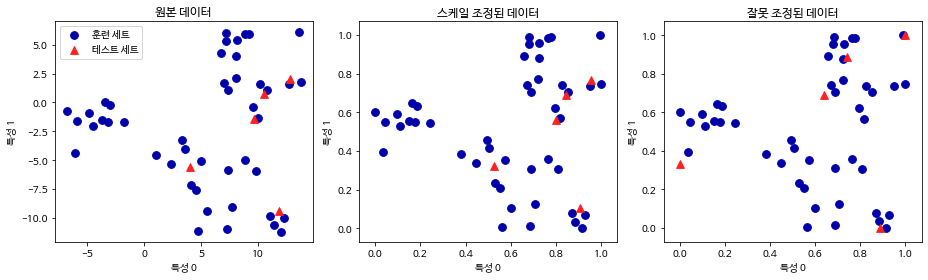

In [24]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

세번째 그래프에서 볼 수 있듯이, 스케일을 서로 다른 방식으로 조정했을 때 어떤 일이 일어나는지 보여준다.

In [27]:
# 단축 메서드와 효율적인 방법
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적입니다
X_scaled_d = scaler.fit_transform(X_train)

### 지도 학습에서 데이터 전처리 효과

사이킷런 0.20 버전에서 `SVC` 클래스의 `gamma` 매개변수 옵션에 `auto`외에 `scale`이 추가되었습니다. `auto`는 `1/n_features`, 즉 특성 개수의 역수입니다. `scale`은 `1/(n_features * X.std())`로 스케일 조정이 되지 않은 특성에서 더 좋은 결과를 만듭니다. 사이킷런 0.22 버전부터는 `gamma` 매개변수의 기본값이 `auto`에서 `scale`로 변경됩니다. 서포트 벡터 머신을 사용하기 전에 특성을 표준화 전처리하면 `scale`과 `auto`는 차이가 없습니다.

In [31]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


SVC 모델을 학습시키기 전에 MinMaxScaler을 사용해 데이터의 스케일을 조정한다.

In [32]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [33]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


## 차원 축소, 특성 추출, 매니폴드 학습